In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import sigkernel as ksig

In [2]:
num_permutations = 1000
n_levels = 10
n_samples = 100
sample_len = 52
dt = 1 / 52
difference = True

static_kernel = ksig.static.kernels.LinearKernel()
sig_kernel = ksig.kernels.SignatureKernel(n_levels, order=n_levels, static_kernel=static_kernel, difference=difference)
kernel = lambda X,Y : sig_kernel(X, Y)
mmd = lambda X,Y : ksig.tests.quadratic_time_mmd(X, Y, kernel)

In [3]:
X = ksig.tests.gen_GBM_path(mu=0.1, sigma=0.2, dt=dt, n_paths=n_samples, seq_len=sample_len).astype(np.float32)
Y = ksig.tests.gen_GBM_path(0.1, 0.4, dt, n_samples, sample_len).astype(np.float32)

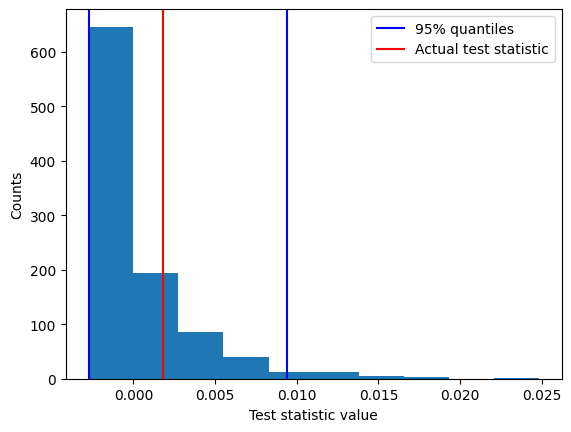

In [4]:
mmd_XY, null_mmd = ksig.tests.sig_kernel_test(X, Y, 4, static_kernel, num_permutations=num_permutations)
ksig.tests.plot_permutation_samples(null_mmd, mmd_XY)

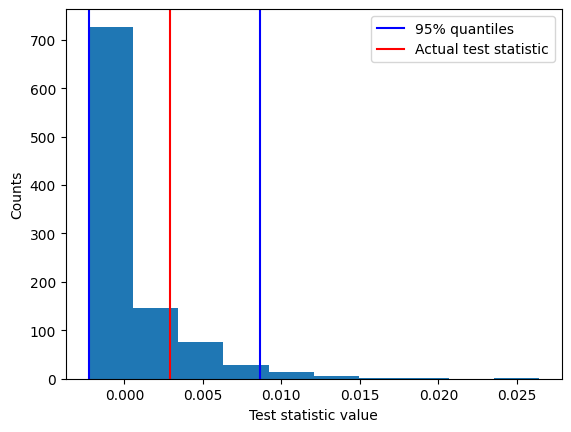

In [5]:
mmd_XY, null_mmd = ksig.tests.sig_kernel_test(np.log(X), np.log(Y), 4, static_kernel, num_permutations=num_permutations)
ksig.tests.plot_permutation_samples(null_mmd, mmd_XY)

In [4]:
ksig.tests.mmd_permutation_ratio_plot(X, Y, n_levels, static_kernel, n_steps=100)

OutOfMemoryError: Out of memory allocating 6,658,560,000 bytes (allocated so far: 5,518,363,136 bytes).

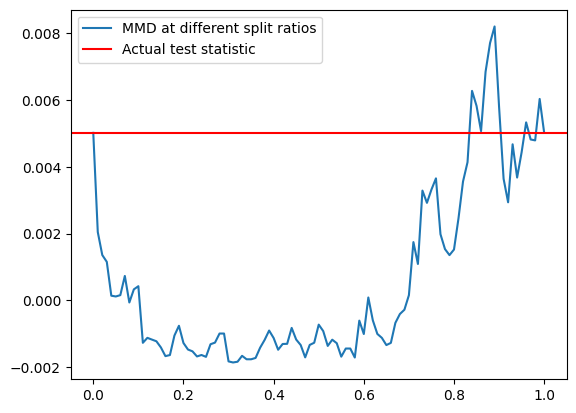

In [ ]:
ksig.tests.mmd_permutation_ratio_plot(np.log(X), np.log(Y), n_levels, static_kernel, n_steps=100)